In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory

# === MOUNT GOOGLE DRIVE ===
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
DATASET_PATH = "/content/drive/My Drive/dogs_n_cats"

# Define parameters
IMG_SIZE = (150, 150)  # Resize images
BATCH_SIZE = 32        # Number of images per batch
SEED = 42              # For reproducibility

# Load train (70%) set
train_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.3,  # 30% of data reserved for validation + test
    subset="training",
    seed=SEED,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 1000 files belonging to 2 classes.
Using 700 files for training.


In [7]:
# Load validation (15%) set
val_test_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.3,  # 30% of data reserved for validation + test
    subset="validation",
    seed=SEED,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# split validation and test sets
total_batches = len(list(val_test_ds))  # Ensure correct batch count
val_batches = total_batches // 2  # 50% for validation, 50% for test

Found 1000 files belonging to 2 classes.
Using 300 files for validation.


In [8]:
val_ds = val_test_ds.take(val_batches)   # First half for validation
test_ds = val_test_ds.skip(val_batches)  # Second half for testing

# Print class names
print("Classes:", train_ds.class_names)

# Check dataset sizes
print(f"Total validation batches: {len(list(val_ds))}")
print(f"Total test batches: {len(list(test_ds))}")

Classes: ['cats_set', 'dogs_set']
Total validation batches: 5
Total test batches: 5


In [ ]:
# 300 files for valid (150) + test(150)

In [9]:

from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define data augmentation layer
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Randomly flip images horizontally
    RandomRotation(0.1),       # Rotate images up to 10%
    RandomZoom(0.1)            # Apply zooming
])

# Apply to training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [11]:
model = Sequential()

# Input Layer with Normalization
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)))

# First Convolutional Layer
model.add(Conv2D(32, (3,3), activation='relu', padding='same',name='conv1'))
model.add(MaxPooling2D((2,2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3,3), activation='relu', padding='same',name='conv2'))
model.add(MaxPooling2D((2,2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent Overfitting
model.add(Dense(1, activation='sigmoid'))  # Output Layer (1 bcz binary classification)


# Compile the model with binary_crossentropy
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Correct loss function
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,401,921 (20.61 MB)

 Trainable params: 5,401,921 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Normalize images (rescale pixel values to [0,1])
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

In [13]:
# Train CNN Model
EPOCHS = 5

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.4929 - loss: 0.6936 - val_accuracy: 0.4500 - val_loss: 0.6942
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5242 - loss: 0.6930 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5337 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4923 - loss: 0.6937 - val_accuracy: 0.3875 - val_loss: 0.6955
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4766 - loss: 0.6939 - val_accuracy: 0.4187 - val_loss: 0.6948


In [14]:
# Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.4339 - loss: 0.6945
Test Accuracy: 0.4500


In [15]:
print(f"Number of batches in test dataset: {len(list(test_ds))}")

Number of batches in test dataset: 5


In [16]:
model

<Sequential name=sequential_2, built=True>

Filters shape for conv1: (3, 3, 3, 32)


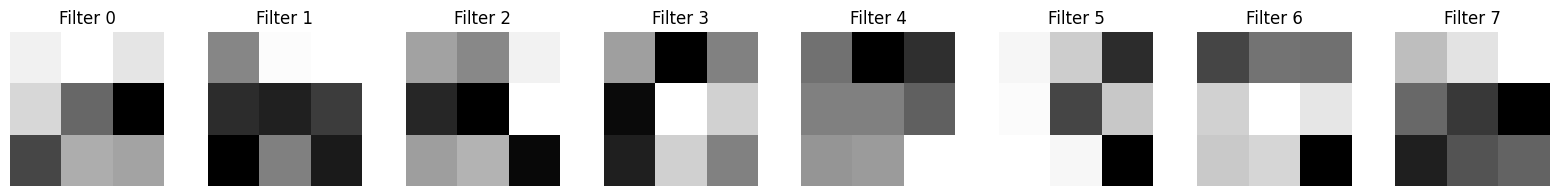

In [18]:
# Function to visualize filters
def visualize_filters(model, layer_name, num_filters=8):
    # Get the weights of the specified layer
    layer = model.get_layer(layer_name)
    filters, biases = layer.get_weights()  # Shape: (filter_height, filter_width, input_channels, num_filters)
    print(f"Filters shape for {layer_name}: {filters.shape}")

    # Normalize filter values to [0, 1] for visualization
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # Plot the filters
    fig, axes = plt.subplots(1, num_filters, figsize=(20, 2))
    for i in range(num_filters):
        if i < filters.shape[-1]:  # Ensure we don't exceed available filters
            # Extract the i-th filter (3x3x3 for RGB input in conv1)
            f = filters[:, :, :, i]
            # If RGB, average across channels or pick one channel (e.g., 0 for red)
            f = np.mean(f, axis=2) if f.shape[2] == 3 else f
            axes[i].imshow(f, cmap='gray')
            axes[i].axis('off')
            axes[i].set_title(f'Filter {i}')
    # plt.suptitle(f'Filters from {layer_name}')
    plt.show()

# Visualize filters from the first convolutional layer
visualize_filters(model, 'conv1', num_filters=8)

# Optionally visualize filters from other layers
# visualize_filters(model, 'conv2', num_filters=8)
# visualize_filters(model, 'conv3', num_filters=8)

**TRANSFER LEARNING**